In [1]:
import os
import sys
from pathlib import Path
curr_path = str(Path(os.getcwd()).parent)
sys.path.append(curr_path)

from scripts.constants import *
from scripts.read import *
from scripts.misc_changes import *

import warnings
warnings.filterwarnings("ignore")
from pyspark.sql.functions import *
from pyspark.sql.column import *
from pyspark.sql.types import *

from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.regression import LinearRegression, LinearRegressionModel
from pyspark.ml.evaluation import RegressionEvaluator

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

spark = create_spark()
PREFIX = "."

23/10/13 13:59:24 WARN Utils: Your hostname, Dalilas-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 10.13.94.85 instead (on interface en0)
23/10/13 13:59:24 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/13 13:59:25 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/10/13 13:59:26 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [2]:
consumer_external = spark.read.parquet("../data/curated/consumer_external_join_age_allocated.parquet")

Write drop column functions for preparing train-test

In [3]:
def transactions_drop_columns(df):
    """
    Drop columns that are not needed for the linear model
    - Parameters
        - df: DataFrame need to be dropped  
    - Returns
        - df: DataFrame after dropping columns
    """
    # Drop Male and Female Age coluns
    gender_age_cols = [col for col in df.columns if "male" in col]
    gender_cols = [col for col in df.columns if f"{GENDER}_" in col]
    
    revenue_level_cols = [col for col in df.columns if REVENUE_LEVEL in col]
    revenue_level_cols = sorted(revenue_level_cols, key=lambda x:len(x))[1:]

    # Order cols
    order_year_cols = [col for col in df.columns if ORDER_YEAR in col]
    order_year_cols = sorted(order_year_cols, key=lambda x:len(x))[1:]

    order_year_cols = [col for col in df.columns if ORDER_YEAR in col]
    order_year_cols = sorted(order_year_cols, key=lambda x:len(x))[1:]

    order_year_cols = [col for col in df.columns if ORDER_YEAR in col]
    order_year_cols = sorted(order_year_cols, key=lambda x:len(x))[1:]

    order_year_cols = [col for col in df.columns if ORDER_YEAR in col]
    order_year_cols = sorted(order_year_cols, key=lambda x:len(x))[1:]

    order_month_cols = [col for col in df.columns if ORDER_MONTH in col]
    order_month_cols = sorted(order_month_cols, key=lambda x:len(x))[1:]

    order_dom_cols = [col for col in df.columns if ORDER_DAY_OF_MONTH in col]
    order_dom_cols = sorted(order_dom_cols, key=lambda x:len(x))[1:]

    order_dow_cols = [col for col in df.columns if ORDER_DAY_OF_WEEK in col]
    order_dow_cols = sorted(order_dow_cols, key=lambda x:len(x))[1:]

    state_cols = [col for col in df.columns if f"{STATE_NAME}_" in col]
    sa2_cols = [col for col in df.columns if SA2_NAME in col]

    earningsum_cols = sorted([col for col in df.columns if "earningsum" in col])[:-1]
    medianage_cols = sorted([col for col in df.columns if "median_age" in col])[:-1]
    earningmedian_cols = sorted([col for col in df.columns if "earningmedian" in col])[:-1]
    earningmean_cols = sorted([col for col in df.columns if "eariningmean" in col])[:-1]
    earners_cols = sorted([col for col in df.columns if "earners" in col])[:-1]
    industry_tag_cols = sorted([col for col in df.columns if "industry_tag" in col])[1:]
    additional_drop = gender_age_cols + earningmedian_cols + medianage_cols + earningsum_cols +\
        earningmean_cols + earners_cols + [RATIO, SA2_CODE_2016, NAME] + industry_tag_cols +\
            order_dom_cols + order_dow_cols + order_month_cols + order_year_cols + \
                gender_age_cols + revenue_level_cols + gender_cols + state_cols + sa2_cols\
    
    return tuple(additional_drop)

def consumer_external_drop_columns(df):
    """
    Drop columns that are not needed for the linear model
    - Parameters
        - df: DataFrame need to be dropped
    - Returns
        - df: DataFrame after dropping columns
    """
    # Drop Male and Female Age coluns
    gender_age_cols = [col for col in df.columns if "male" in col]
    gender_cols = [col for col in df.columns if f"{GENDER}_" in col]
    
    revenue_level_cols = [col for col in df.columns if REVENUE_LEVEL in col]
    revenue_level_cols = sorted(revenue_level_cols, key=lambda x:len(x))[1:]

    # Order cols
    order_year_cols = [col for col in df.columns if ORDER_YEAR in col]
    order_year_cols = sorted(order_year_cols, key=lambda x:len(x))[1:]

    order_year_cols = [col for col in df.columns if ORDER_YEAR in col]
    order_year_cols = sorted(order_year_cols, key=lambda x:len(x))[1:]

    order_year_cols = [col for col in df.columns if ORDER_YEAR in col]
    order_year_cols = sorted(order_year_cols, key=lambda x:len(x))[1:]

    order_year_cols = [col for col in df.columns if ORDER_YEAR in col]
    order_year_cols = sorted(order_year_cols, key=lambda x:len(x))[1:]

    order_month_cols = [col for col in df.columns if ORDER_MONTH in col]
    order_month_cols = sorted(order_month_cols, key=lambda x:len(x))[1:]

    order_dom_cols = [col for col in df.columns if ORDER_DAY_OF_MONTH in col]
    order_dom_cols = sorted(order_dom_cols, key=lambda x:len(x))[1:]

    order_dow_cols = [col for col in df.columns if ORDER_DAY_OF_WEEK in col]
    order_dow_cols = sorted(order_dow_cols, key=lambda x:len(x))[1:]

    state_cols = [col for col in df.columns if f"{STATE_NAME}_" in col]
    sa2_cols = [col for col in df.columns if SA2_NAME in col]

    earningsum_cols = sorted([col for col in df.columns if "earningsum" in col])
    medianage_cols = sorted([col for col in df.columns if "median_age" in col])
    earningmedian_cols = sorted([col for col in df.columns if "earningmedian" in col])
    earningmean_cols = sorted([col for col in df.columns if "eariningmean" in col])
    earners_cols = sorted([col for col in df.columns if "earners" in col])
    industry_tag_cols = sorted([col for col in df.columns if "industry_tag" in col])
    additional_drop = gender_age_cols + earningmedian_cols + medianage_cols + earningsum_cols +\
        earningmean_cols + earners_cols + [RATIO, SA2_CODE_2016, NAME] + industry_tag_cols +\
            order_dom_cols + order_dow_cols + order_month_cols + order_year_cols + \
                gender_age_cols + revenue_level_cols + gender_cols + state_cols + sa2_cols\
    
    return tuple(additional_drop)


Function for preparing train and test files including String Indexing and Vector Assembling

In [4]:
def prepare_train_test_files(consumer_external: DataFrame):
    """
    Prepare train and test files for the linear model
    - Parameters
        - consumer_external: DataFrame of consumer external data
    - Returns
        - train: DataFrame of train data
        - test: DataFrame of test data
    """
    
    JOIN_COLUMNS = [USER_ID, SA2_CODE, STATE, POSTCODE, GENDER]
    INDUSTRY_1 = "tent awning"
    INDUSTRY_2 = "gift card novelty souvenir"
    INDUSTRY_3 = "digital goods books movies music"
    industries = [INDUSTRY_1, INDUSTRY_2, INDUSTRY_3]
    order_cols = (col(ORDER_YEAR), col(ORDER_MONTH), col(ORDER_DAY_OF_MONTH))
    INDEXED_COL = "_indexed"
    cat_cols = [MERCHANT_ABN, SA2_CODE, STATE, USER_ID, GENDER, ALLOCATED_AGES, INDUSTRY_TAGS]

    print("IMPORT ALL TRANSACTION FILES")
    transactions_all_files = [f"{PREFIX}{CURATED_TRANSACTIONS_ALL_PATH}{fname}" for fname in os.listdir(PREFIX+CURATED_TRANSACTIONS_ALL_PATH)]

    # First 6 files are train, next 3 are test
    print("DEFINE TRAIN AND TEST FILES")
    train_data_files = transactions_all_files[0:9]
    test_data_files = transactions_all_files[9:12]
    
    print("DROP IRRELEVANT COLUMNS FOR CONSUMER EXTERNAL")
    drop_cols = consumer_external_drop_columns(consumer_external)
    consumer_external = consumer_external.drop(*(drop_cols))

    # train_data_files
    print("READ TRAIN/TEST FILES")
    train_df = spark.read.parquet(*train_data_files)
    test_df = spark.read.parquet(*test_data_files)

    # Now save the model
    print("PERFORM CLEANING/TRANSFORMATIONS FOR TRAIN")
    drop_cols = transactions_drop_columns(train_df)
    test_path = "./test_files/model_save_test/"
    train_df = train_df.drop(*drop_cols)
    train_df = cast_data_type(train_df)
    train_df = encode_revenue_level(train_df)
    train_df = train_df.withColumns({
        USER_ID: col(USER_ID).cast(StringType()),
        MERCHANT_ABN: col(MERCHANT_ABN).cast(StringType())
    })
    
    print("PERFORM CLEANING/TRANSFORMATIONS FOR TEST")
    test_df = test_df.drop(*drop_cols)
    test_df = cast_data_type(test_df)
    test_df = encode_revenue_level(test_df)
    test_df = test_df.withColumns({
        USER_ID: col(USER_ID).cast(StringType()),
        MERCHANT_ABN: col(MERCHANT_ABN).cast(StringType())
    })
    
    print("PERFORM JOINING TO CONSUMER ROWS")
    train_transactions = train_df.join(consumer_external, on=JOIN_COLUMNS, how=INNER_JOIN)
    test_transactions = test_df.join(consumer_external, on=JOIN_COLUMNS, how=INNER_JOIN)
    
    print("PERFORM DELETION OF SPECIFIC COLUMNS")
    train_transactions = train_transactions.drop(ORDER_ID, POSTCODE, ORDER_DAY_OF_WEEK)
    test_transactions = test_transactions.drop(ORDER_ID, POSTCODE, ORDER_DAY_OF_WEEK)
    
    print("PERFORM FILTERING OF TOP 3 INDUSTRIES")
    train_transactions = train_transactions.where(col(INDUSTRY_TAGS).isin(industries)).orderBy(*order_cols)
    test_transactions = test_transactions.where(col(INDUSTRY_TAGS).isin(industries)).orderBy(*order_cols)
    
    df_columns = train_transactions.columns
    
    print("PERFORM STRING INDEXING")
    for column in cat_cols:
        col_indexer = StringIndexer(inputCol=column, outputCol=column+INDEXED_COL, handleInvalid="keep")
        df_columns.append(column+INDEXED_COL)
        fitted_indexer = col_indexer.fit(train_transactions)
        train_transactions = fitted_indexer.transform(train_transactions)
        test_transactions = fitted_indexer.transform(test_transactions)

    df_columns = [col for col in df_columns if col not in cat_cols]
    df_columns = [col for col in df_columns if col != DOLLAR_VALUE]
    
    print("PERFORM VECTOR ASSEMBLING")
    assembler = VectorAssembler(inputCols=df_columns, outputCol="features")
    train_vec_transactions = assembler.transform(train_transactions)
    test_vec_transactions = assembler.transform(test_transactions)

    return train_vec_transactions, test_vec_transactions        

Perform hyperparameters tuning - takes about an hour

In [5]:
def perform_hyperparams_tuning_lr(train, test):
    """
    Perform hyperparameter tuning for the linear regression model
    - Parameters
        - train: DataFrame of train data
        - test: DataFrame of test data
    - Returns
        - mae_scores: List of MAE scores for each set of hyperparameters
        - params: List of hyperparameters
    """
    
    LEARNING_RATE = 0.01
    L1_PENALTY = 0.1
    NUM_ITERS = 100
    EPSILON = 0.000001
    mae_scores = []
    params = []

    # Hyperparamters to tune for
    REG_PARAMS = [0.001, 0.01, 0.1, 1, 10, 100]
    ELASTIC_NET_PARAMS = [0.0, 0.25, 0.5, 0.75, 1.0]
    
    for reg in REG_PARAMS:
        for net in ELASTIC_NET_PARAMS:
            print(f"Reg: {reg}, Net: {net}")
            lr = LinearRegression(featuresCol="features", labelCol=DOLLAR_VALUE, 
                            predictionCol=f"predicted_{DOLLAR_VALUE}",
                            maxIter=100, regParam=reg, elasticNetParam=net)
            lr_model = lr.fit(train)
            predictions = lr_model.transform(test)
            
            evaluator = RegressionEvaluator(labelCol=DOLLAR_VALUE, predictionCol=f"predicted_{DOLLAR_VALUE}", metricName="mae")
            score = evaluator.evaluate(predictions)
            mae_scores.append(score)
            params.append((reg, net))
            print(f"Score: {score}")
    
    return params, mae_scores

Perform linear regression with decided parameters

In [6]:
def run_linear_regression(train, test, params: dict()):
    """
    Run the linear regression model
    - Parameters
        - train: DataFrame of train data
        - test: DataFrame of test data
        - params: Dictionary of hyperparameters
    - Returns
        - lr_model: Trained linear regression model
        - predictions: DataFrame of predictions
    """

    print("BEGIN TRAINING MODEL")
    lr = LinearRegression(featuresCol="features", labelCol=DOLLAR_VALUE, 
                            predictionCol=f"predicted_{DOLLAR_VALUE}",
                            regParam=params["reg"], elasticNetParam=params["net"])
    lr_model = lr.fit(train)
    print("PRODUCE PREDICTIONS")
    predictions = lr_model.transform(test)

    return lr_model, predictions

In [7]:
params = {"reg": 100, "net": 0.25} # best parameters

train_vec, test_vec = prepare_train_test_files(consumer_external)
# params = perform_hyperparams_tuning_lr(train_vec, test_vec)
lr_model, predictions = run_linear_regression(train_vec, test_vec, params)

mae_evaluator = RegressionEvaluator(labelCol=DOLLAR_VALUE, predictionCol=f"predicted_{DOLLAR_VALUE}", metricName="mae") 
r2_evaluator = RegressionEvaluator(labelCol=DOLLAR_VALUE, predictionCol=f"predicted_{DOLLAR_VALUE}", metricName="r2")
mae_score = mae_evaluator.evaluate(predictions)
r2_score = r2_evaluator.evaluate(predictions)

IMPORT ALL TRANSACTION FILES
DEFINE TRAIN AND TEST FILES
DROP IRRELEVANT COLUMNS FOR CONSUMER EXTERNAL
READ TRAIN/TEST FILES
PERFORM CLEANING/TRANSFORMATIONS FOR TRAIN
PERFORM CLEANING/TRANSFORMATIONS FOR TEST
PERFORM JOINING TO CONSUMER ROWS
PERFORM DELETION OF SPECIFIC COLUMNS
PERFORM FILTERING OF TOP 3 INDUSTRIES
PERFORM STRING INDEXING


PERFORM VECTOR ASSEMBLING
BEGIN TRAINING MODEL


23/10/13 14:02:21 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS


PRODUCE PREDICTIONS


In [17]:
# extract the relevant column values
PREDICTED_DOLLARS = "predicted_dollar_value"
RESIDUALS = "residuals"
pred_values = predictions.select(DOLLAR_VALUE, f"predicted_{DOLLAR_VALUE}")
pred_values = pred_values.withColumn(PREDICTED_DOLLARS, round(PREDICTED_DOLLARS, 2))
pred_values = pred_values.withColumn(RESIDUALS, col(DOLLAR_VALUE) - col(PREDICTED_DOLLARS))

sampled_values = pred_values.sample(fraction=0.05)

residuals = [row[RESIDUALS] for row in sampled_values.collect()]
predicted_dollar = [row[PREDICTED_DOLLARS] for row in sampled_values.collect()]
actual_dollar = [row[DOLLAR_VALUE] for row in sampled_values.collect()]

# Calculate standardized residuals
residual_std = np.std(residuals)
standardized_residuals = residuals / residual_std

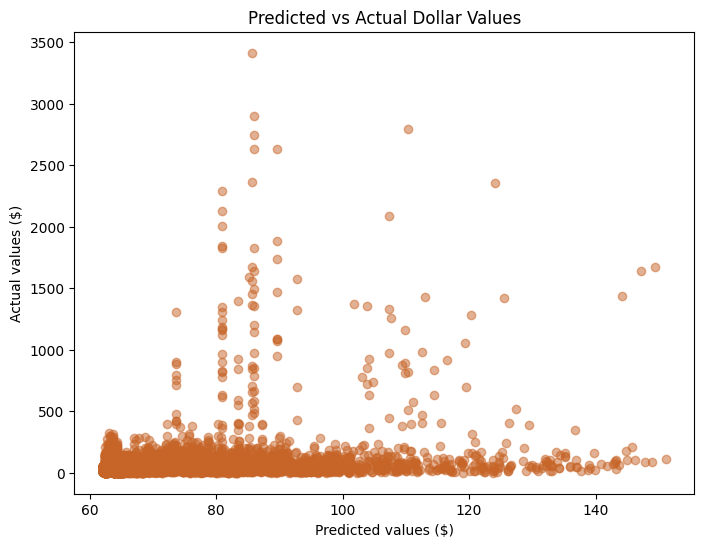

In [18]:
# Create a scatter plot of actual against predicted values
plt.figure(figsize=(8, 6))
plt.scatter(predicted_dollar, actual_dollar, alpha=0.5, c="#C76528")
plt.title("Predicted vs Actual Dollar Values")
plt.xlabel("Predicted values ($)")
plt.ylabel("Actual values ($)")
plt.savefig("../plots/predicted_vs_actual_dollars.png")
plt.show()


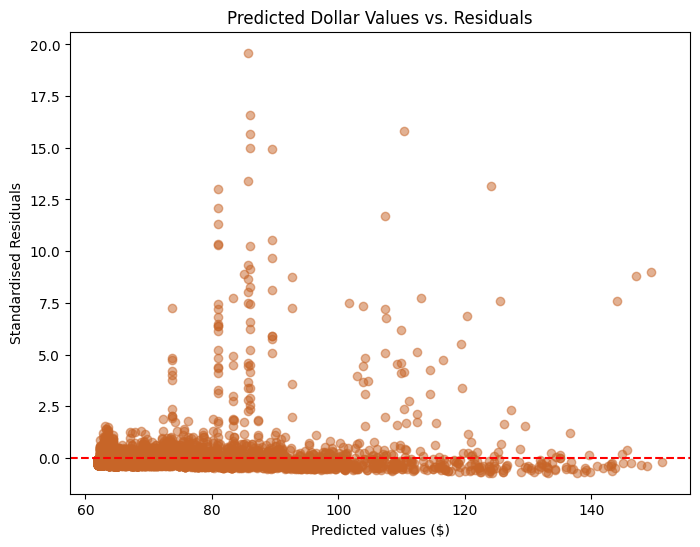

In [19]:
# Create a scatter plot of residuals against predicted values
plt.figure(figsize=(8, 6))
plt.scatter(predicted_dollar, standardized_residuals, alpha=0.5, c="#C76528")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Predicted Dollar Values vs. Residuals")
plt.xlabel("Predicted values ($)")
plt.ylabel("Standardised Residuals")
plt.savefig("../plots/updated_residuals.png")
plt.show()